In [1]:
%matplotlib inline
%config InlineBackend.figure_formats = ['svg']
from matplotlib import pyplot as plt
import torch
import torchvision
from torch.utils import data

In [2]:
def load_data_fashion_mnist(batch_size, dataloader_worker_count, resize=None):
    trans = [torchvision.transforms.ToTensor()]
    if resize:
        trans.insert(0, torchvision.transforms.Resize(resize))
    trans.append(torchvision.transforms.RandomCrop((28, 28)))
    trans = torchvision.transforms.Compose(trans)
    mnist_train = torchvision.datasets.FashionMNIST(
        root="../data", train=True, transform=trans, download=True)
    mnist_test = torchvision.datasets.FashionMNIST(
        root="../data", train=False, transform=trans, download=True)
    return (data.DataLoader(mnist_train, batch_size, shuffle=False, num_workers=dataloader_worker_count),
            data.DataLoader(mnist_test, batch_size, shuffle=False, num_workers=dataloader_worker_count))

In [3]:
train_iter, test_iter = load_data_fashion_mnist(18, 4, resize=40)

In [4]:
def get_fashion_mnist_labels(labels):
    '''
    返回Fashion-MNIST数据集的文本标签
    '''
    text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
    return [text_labels[int(i)] for i in labels]

def show_images(imgs, num_rows, num_cols, titles=None, scale=1.2):
    '''
    绘制图像列表
    '''
    figsize = (num_cols * scale, num_rows * scale)
    _, axes = plt.subplots(num_rows, num_cols, figsize=figsize)
    axes = axes.flatten()
    for i, (ax, img) in enumerate(zip(axes, imgs)):
        if torch.is_tensor(img):
            # 图片张量
            ax.imshow(img.numpy())
        else:
            # PIL图片
            ax.imshow(img)
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)
        if titles:
            ax.set_title(titles[i])
    return axes

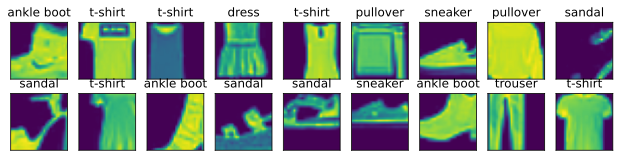

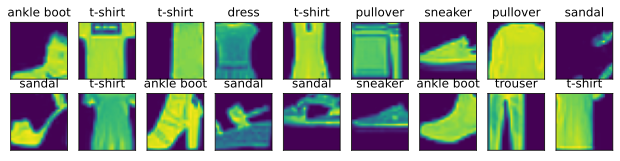

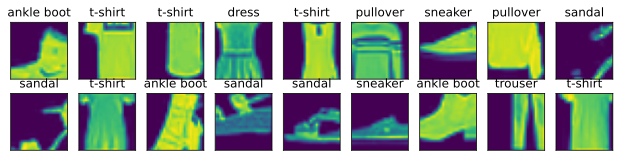

In [5]:
for _ in range(3):
	for i, (X, y) in enumerate(train_iter):
		if i == 0:
			show_images(X.reshape(18, 28, 28), 2, 9, titles=get_fashion_mnist_labels(y))